# MLOpt EnergyBuildings

MLOpt EnergyBuildings" is a repository dedicated to leveraging Machine Learning (ML) techniques for optimizing energy efficiency in buildings. Explore cutting-edge methods, tools, and resources for enhancing the sustainability and performance of architectural designs and energy systems within the built environment

# Setup Inicial

In [ ]:
#Importa arquivos do Github
!git clone https://github.com/H3nriqu3L/MLOpt-EnergyBuildings.git

In [ ]:
#Bibliotecas Necessarias
!pip install numpy pandas matplotlib seaborn scikit-learn tensorflow keras


# DeepLearning

In [ ]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from sklearn.model_selection import train_test_split

from keras.models import Sequential

from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Conv2D, LeakyReLU

from tensorflow.keras.optimizers import Adam
from keras.optimizers import Nadam
from keras.optimizers import RMSprop



from sklearn.preprocessing import QuantileTransformer
from keras.regularizers import l2

In [ ]:
import os
import pandas as pd

folder_path = 'MLOpt-EnergyBuildings/Dataset'
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Inicializar um DataFrame vazio para armazenar os dados
merged_df = pd.DataFrame()

for csv_file in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    df = pd.read_csv(file_path, decimal=',', nrows=631)  # Lê apenas as primeiras 631 linhas

    # Exclua a coluna "Cálculo Gráfico" (coluna 6)
    df = df.drop(columns=['Cálculo Gráfico'])

    # Remova colunas vazias (se houver)
    df = df.dropna(axis=1, how='all')

    # Verifique se o DataFrame está vazio (para evitar a repetição do cabeçalho)
    if merged_df.empty:
        merged_df = df
    else:
        # Anexe os dados ao DataFrame, excluindo o cabeçalho duplicado
        merged_df = pd.concat([merged_df, df.iloc[1:]], ignore_index=True)

# Salve o DataFrame mesclado em um novo arquivo CSV
merged_df.to_csv('merged_dataset.csv', index=False)




## Carregar e Separar Dataframe

In [ ]:
# Carregar o conjunto de dados
df = pd.read_csv('merged_dataset.csv')

X = df.drop(columns=['f(x)']).values
y = df['f(x)'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

quantile_transformer = QuantileTransformer()
y_train_normalized = quantile_transformer.fit_transform(y_train.reshape(-1, 1))


In [ ]:
model = keras.Sequential()

# Camada de entrada
model.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.1)))  # Aumento da regularização
model.add(BatchNormalization())
model.add(Dropout(0.2))  # Adicione uma camada Dropout para regularização

# Camada oculta
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.1)))  # Aumento da regularização
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Camada oculta
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.1)))  # Aumento da regularização
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Camada oculta
model.add(Dense(1024, activation='relu', kernel_regularizer=l2(0.1)))  # Aumento da regularização
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Camada oculta
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.1)))  # Aumento da regularização
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(LeakyReLU(alpha=0.01))

# Camada oculta
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.1)))  # Aumento da regularização
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Camada de saída
model.add(Dense(1))  # Camada de saída para regressão

# Compile o modelo
#nadam_optimizer = Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
optimizer = RMSprop(learning_rate=0.001, rho=0.9)

model.compile(optimizer='RMSprop', loss='mean_squared_error')

In [ ]:
# Treinamento do modelo
# Dentro do treinamento do modelo
history = model.fit(X_train, y_train, epochs=60, batch_size=128, validation_split=0.2, verbose=2)


# Avaliação do modelo no conjunto de teste
loss = model.evaluate(X_test, y_test, verbose=2)
print(f"Loss no conjunto de teste: {loss}")




Epoch 1/60
79/79 - 8s - loss: 19232.4199 - val_loss: 16695.7109 - 8s/epoch - 105ms/step
Epoch 2/60
79/79 - 5s - loss: 18772.6582 - val_loss: 18092.6523 - 5s/epoch - 66ms/step
Epoch 3/60
79/79 - 5s - loss: 18104.9492 - val_loss: 17380.8164 - 5s/epoch - 68ms/step
Epoch 4/60
79/79 - 4s - loss: 17246.5918 - val_loss: 16561.4297 - 4s/epoch - 44ms/step
Epoch 5/60
79/79 - 3s - loss: 16214.5400 - val_loss: 14856.9473 - 3s/epoch - 42ms/step
Epoch 6/60
79/79 - 3s - loss: 15003.4766 - val_loss: 13556.8027 - 3s/epoch - 43ms/step
Epoch 7/60
79/79 - 5s - loss: 13662.4971 - val_loss: 12552.1836 - 5s/epoch - 58ms/step
Epoch 8/60
79/79 - 3s - loss: 12213.7754 - val_loss: 10744.2949 - 3s/epoch - 44ms/step
Epoch 9/60
79/79 - 4s - loss: 10677.3457 - val_loss: 9482.0508 - 4s/epoch - 48ms/step
Epoch 10/60
79/79 - 4s - loss: 9097.2119 - val_loss: 7924.3159 - 4s/epoch - 56ms/step
Epoch 11/60
79/79 - 3s - loss: 7517.3032 - val_loss: 7009.4658 - 3s/epoch - 44ms/step
Epoch 12/60
79/79 - 4s - loss: 5962.6743 - va

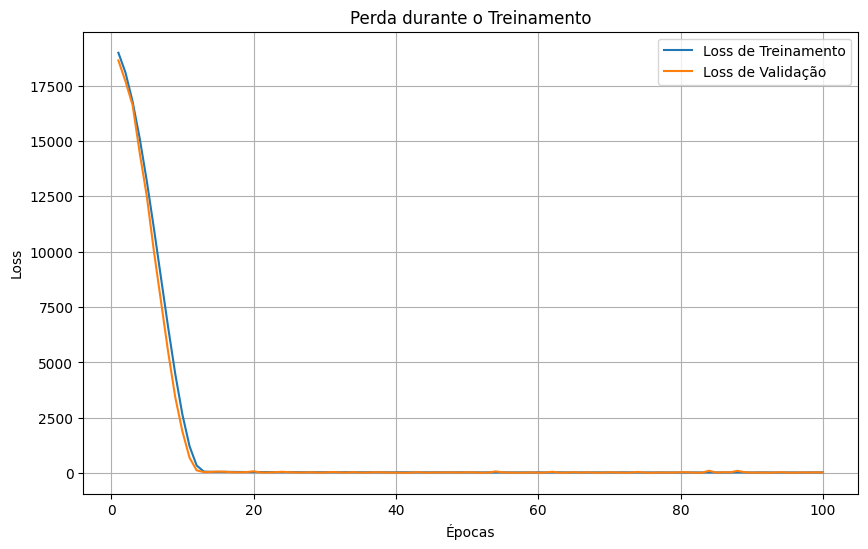

In [ ]:
# Extrair informações do histórico
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Criar um gráfico de perda em relação ao número de épocas
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Loss de Treinamento')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Loss de Validação')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('Perda durante o Treinamento')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Faça previsões no conjunto de teste
y_pred = model.predict(X_test)

# Crie um DataFrame para visualizar os resultados
results_df = pd.DataFrame({'Valor Real (f(x))': y_test, 'Valor Previsto': y_pred.flatten()})

# Exiba as previsões e os valores reais
results_df


99/99 [==============================] - 1s 8ms/step


,Valor Real (f(x)),Valor Previsto
0,135.253612,134.273666
1,133.330454,133.405746
2,137.790556,140.027817
3,140.705912,137.824142
4,142.135249,140.183060
...,...,...
3146,133.127915,133.439407
3147,133.003456,133.394165
3148,135.191890,134.971237
3149,133.033734,137.558975


In [ ]:

# Valores de entrada que você deseja prever
valores_de_entrada = np.array([
    [73.51, 5.728, 5.9, 0.2442],
    [160.19, 5.301, 4.863, 0.3811],
    [99.6, 5.055, 5.044, 0.4071],
    [-110.83, 5.9, 3.923, 0.4005],
    [108.74, 5.869, 5.883, 0.2],
    [73.37, 5.732, 5.89, 0.2453],
    [-41.74, 5.012, 4.085, 0.6814],
    [44.56, 5.896, 5.899, 0.3541],
    [73.33, 5.733, 5.885, 0.2967],
    [-103.99, 4.913, 5.453, 0.3814],
    [28.58, 5.895, 5.593, 0.3771],
    [75.08, 5.756, 5.9, 0.2397],
    [9.97, 4.019, 5.817, 0.6868],
    [-71.86, 5.842, 5.833, 0.3031],
    [54.37, 5.808, 5.885, 0.3011],
    [54.6, 5.686, 5.892, 0.3005],
    [87.96, 5.623, 5.725, 0.2932],
    [72.8, 5.227, 5.896, 0.3425],
    [71.59, 0.3301, 5.893, 0.3301],
    [69.23, 5.475, 5.856, 0.3329],
    [69.81, 5.474, 5.863, 0.3331],
    [70.1, 5.474, 5.866, 0.3332],
    [-92.47, 5.614, 5.821, 0.4231],
    [-92.8, 5.784, 5.885, 0.3746],
    [74.69, 5.344, 5.9, 0.3079],
    [74.37, 5.338, 5.9, 0.3072],
    [108.87, 5.171, 5.686, 0.3897],
    [70, 5.868, 5.774, 0.2748],
    [74.31, 5.791, 5.835, 0.2384],
    [73.47, 5.726, 5.9, 0.2443]
])

valor_real = [
    133.258925,
    137.634102,
    135.121182,
    137.693343,
    135.565727,
    133.254667,
    135.038875,
    133.169602,
    135.330894,
    137.431043,
    133.146198,
    133.406546,
    133.702926,
    134.023286,
    134.004834,
    133.568836,
    133.834859,
    133.655621,
    133.458455,
    133.473589,
    133.458377,
    134.723443,
    134.500509,
    133.604228,
    133.617213,
    135.253686,
    133.268486,
    133.5142,
    133.318062,
    133.489056
]


# Faça previsões com o modelo
previsoes = model.predict(valores_de_entrada)

# Calcule a diferença entre os valores previstos e os valores reais (F(x))
diferencas = valor_real - previsoes.flatten()

diferencas[12]=0

# Crie um DataFrame para a tabela
tabela = pd.DataFrame({
    'VALOR PREDITO': previsoes.flatten(),
    'VALOR REAL': valor_real,
    'DIFERENÇA': diferencas
})

# Imprima a tabela
print(tabela)


1/1 [==============================] - 0s 31ms/step
    VALOR PREDITO  VALOR REAL  DIFERENÇA
0      133.411011  133.258925  -0.152086
1      138.547470  137.634102  -0.913368
2      135.193802  135.121182  -0.072620
3      136.162308  137.693343   1.531035
4      133.952133  135.565727   1.613594
5      133.408920  133.254667  -0.154253
6      138.129593  135.038875  -3.090718
7      133.948257  133.169602  -0.778655
8      133.435318  135.330894   1.895576
9      133.899063  137.431043   3.531980
10     135.444107  133.146198  -2.297909
11     133.415390  133.406546  -0.008844
12     141.674637  133.702926   0.000000
13     133.329300  134.023286   0.693986
14     133.597336  134.004834   0.407498
15     133.643784  133.568836  -0.074948
16     133.605850  133.834859   0.229009
17     133.590591  133.655621   0.065030
18     137.649155  133.458455  -4.190700
19     133.520691  133.473589  -0.047102
20     133.519089  133.458377  -0.060712
21     133.518188  134.723443   1.205255
22   

In [ ]:
# Diferenças entre os valores reais e os valores preditos
diferencas = np.array(diferencas)

# Calcular o erro quadrático para cada diferença
erros_quadraticos = diferencas ** 2

# Calcular a média dos erros quadráticos
mse = erros_quadraticos.mean()

# Calcular a raiz quadrada do MSE para obter a RMSE
rmse = np.sqrt(mse)

print(f"RMSE das diferenças: {rmse}")

RMSE das diferenças: 1.4570279166912388
